# Connecting random walkers to the diffusion of water molecules in the brain

By Hans Barstad Westbye, Sebastian Eide Aas and Edgar Fürst Hellsegg

## Introduction

As we know, diffusion is a process resulting from random movements of molecules from a region of high concentration to a region of lower concentration of the given molecule. These Brownian movements can be described by a stochastic process and their velocity follows a normal probability distribution. The movement in question can be characterized as a random walk, forming the basis of the present report. A random walk can be used to describe the diffusion of water molecules, and their application is very important in locating tumors. What we want to show is that there is a connection between random walkers and the diffusion of water molecules in the brain. We know that the change in diffusion found in tumors can be used to identify where the tumors are, because there is less diffusion in an area with higher cell density. The reason for this is that where there is higher cell density, the water molecules trying to diffuse will face more cells and therefore diffuse less than in healthy tissue. 

What we will do to demonstrate this is to first show that if the density of the cells is normally distributed, that is $\phi (x,t)$, it satifies the partial differential equation that describes the diffusion as stated below. The result of this will then confirm that the density of the cells follow a Gaussian probability distribution, meaning that we can use random walks to describe the diffusion of water molecules. From then on we want to simulate random walkers in one and two dimensions. After this we will use the random walkers to simulate the diffusion of water molecules in the brain, and observe how they behave in healthy tissue and in tumors. We will then discuss how accurate this model is to detect the position of tumors. 

## Task 1

We'll start by showing that the density of the cells at position $x$ and time $t$, $\phi(x,t)$, is normally distributed with expectation $\mu=0$ og variance $\sigma^{2}=at$. We will show this by directly substituting $\phi(x,t)$ into the partial differential equation describing the diffusion,


$$\frac{\partial \phi(x,t)}{\partial t} = D\frac{\partial^{2}\phi(x,t)}{\partial x^2},$$


where $D$ is the diffusion constant described by the equation $D=\frac{(\Delta x)^{2}}{2\Delta t}.$

When we look at free random walkers in one and two dimensions, we define $\Delta x$ and $\Delta t$ to be dimensionless and equal to 1 (note that this is only for the first part of the project). That gives us the value of the diffusion constant $D=\frac{1}{2}$. We then differentiate $\phi$(x,t) with respect to $t$: 

$$\frac{\partial \phi(x,t)}{\partial t} = \frac{\partial}{\partial t} \frac{1}{\sqrt{2\pi}} \frac{1}{\sigma} e^{-\frac{1}{2} \frac{x^2}{at}},$$

which gives us 

$$\frac{\partial \phi(x,t)}{\partial t} = -\frac{(at-x^{2})e^{-\frac{x^2}{2a}}}{2\sqrt{2\pi}t^2a\sqrt{at}}.$$

We then differentiate twice with respect to $x$ and obtain 

$$\frac{\partial^{2}\phi(x,t)}{\partial x^{2}} = \frac{(x^{2}-at)e^{-\frac{x^2}{2at}}}{\sqrt{2\pi}a^{2}t^{2}\sqrt{at}}.$$

When we put these two results back to the partial differential equation, we obtain

$$ -\frac{(at-x^{2})e^{-\frac{x^2}{2a}}}{2\sqrt{2\pi}t^2a\sqrt{at}} = \frac{1}{2}\frac{(x^{2}-at)e^{-\frac{x^2}{2at}}}{\sqrt{2\pi}a^{2}t^{2}\sqrt{at}}, $$

and then tidying up, the result we finally get is

$$1=\frac{1}{a}.$$

We observe that for the equation to hold with a normal probability distribution we have to choose $a=1$. That means that the variance is proportional to the time, which we will get back to later in the report. 


What we will do next is to implement the first algorithm given in the assignment. This will allow us to simulate the movement for one random walker. We will then plot the movement for three different probabilities for movement to the right, $p_r$, to see if the simulations are representative for the given values of the probabilities. This algorithm will be used when we will simulate the movements for several random walkers in one and two dimensions, and it's therefore essential that this function works properly. 

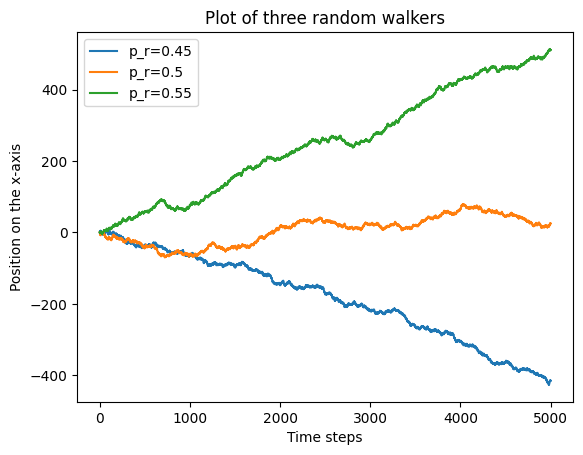

In [1]:
#TASK 1B,C

                                                                                #imports nescessary libraries 
import numpy as np
import matplotlib.pyplot as plt
import scipy

                                                                                #defines delta_x and delta_t to be dimensionless and equal to 1 in the first task
delta_x = 1
delta_t = 1

def oneRandomWalker(M, p_r):
    '''
    Calculates the movement for one random walker in one dimension.

    Parameters
    ----------
    M : INT
        number of timesteps.
    p_r : FLOAT
        probability of going to the right.

    Returns
    -------
    pos : ARRAY
        array containing the random walker's position.
    t : ARRAY
        array containing the time.

    '''
    t = np.zeros(M)                                                             #creates an array with zeros at the size of the timesteps
    
                                                                                #loops through the timesteps to get the array containing time
    for i in range(1, M):
        steg = t[i-1] + delta_t                                                 #finds the next timestep
        t[i] = steg                                                             #adds the timestep to the time array

    pos = np.zeros(M)                                                           #creates an array with zeros at the size of the timesteps
    random = np.random.uniform(0, 1, M)                                         #generates a random number

                                                                                #loops through the timesteps and checks if the random walker goes to the right or left
    for i in range(1, M):
        if random[i] < p_r:                                                     #checks if the walker goes to the right
            pos[i] = pos[i-1] + delta_x                                         #moves the walker to the right
        else:
            pos[i] = pos[i-1] - delta_x                                         #moves the walker to the left 
    return pos, t
        
                                                                                #plots the position as a function of time
pos, t = oneRandomWalker(5000, 0.45)
plt.plot(t,pos, label = "p_r=0.45")                                             #plots the movement with a probability of 45% to go to the right
pos, t = oneRandomWalker(5000,0.5)     
plt.plot(t,pos,label = "p_r=0.5")                                               #plots the movement with a probability of 50% to go to the right
pos, t = oneRandomWalker(5000,0.55)
plt.plot(t,pos,label = "p_r=0.55")                                              #plots the movement with a probability of 55% to go to the right
plt.xlabel("Time steps")
plt.ylabel("Position on the x-axis")
plt.title("Plot of three random walkers")
plt.legend()
plt.show()


As a walker moves to the right in our one-dimensional simulation, its position on the x-axis will be positive. Therefore, a movement to the right, will translate to an increase in value in the plot. Consequently, a movement to the left will translate to a decrease in value. As we have chosen 5000 time steps, we should see the blue line move away from 0 and decrease in value, as it has a higher probability of moving left on the x-axis than right. The green line should have the same behaviour (in the opposite direction), as it has the same probability of movement as the blue line only toward the positive direction on the x-axis. The orange line should vary around the 0 mark as it has an equal probability to move either way. The plot indicates that the random walkers behave as they should, given their specific parameters. Given the accuracy of this algorithm, we can with certainty use it when writing a function that calculates the movement of several random walkers.

Now that we have a function that calculates the movement of one random walker in one dimension, we would like to extend this functionality by creating a function that does the same but for $N$ random walkers. The reason we want to do this is that to connect the movement of random walkers in two dimensions to the diffusion of water molecules, we have to be able to simulate for multiple random walkers as several random walkers produce an accurate simulation. We can then extend the functionality further by using this function to calculate their movement in two dimensions, as it gives a more accurate representation of diffusion in the brain. 

In [2]:
#TASK 1D

def severalRandomWalkers(N,M,pR):
    """
    Calculates the position for several random walkers

    Parameters
    ----------
    N: INT 
        number of random walkers.
    M: INT
        timesteps.
    pR: FLOAT
        probability to go to the right .

    Returns
    -------
    NwalkersPosition: ARRAY 
                        containing the positions for N random walkers
    NwalkersTime: ARRAY
                        containing the timesteps

    """
                                                                            #creates empty lists for the position and time
    NwalkersPosition = []
    NwalkersTime = []


    for i in range(N):                                                      #loops through the number of random walkers and appending the position and time for each walker
        oneWalkerPosition, oneWalkerTime = oneRandomWalker(M, pR)
        NwalkersPosition.append(oneWalkerPosition)                          #adds the position to the empty position array
        NwalkersTime.append(oneWalkerTime)                                  #adds the time to the empty time array
        
    return NwalkersPosition, NwalkersTime

%timeit x, y = severalRandomWalkers(1000,1000,0.5)                          #takes the time for the code to run

502 ms ± 6.59 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
#TASK 1E

def fasterFunc(M,pR):
    '''
    Calculates the movement of one random walker as a cumulative sum of 1 and -1. 

    Parameters
    ----------
    M : INT
        number of timesteps.
    pR : FLOAT
        probability of going to the right.

    Returns
    -------
    positions : ARRAY
        contains the position of the random walker.
    time : ARRAY
        cointains the time.

    '''
    array = [1,-1]
    number = np.random.choice(array,size=M, replace = True, p=[pR, 1-pR])       #uses numpy's random choice to randomly choose between -1 and 1 with a probability given in the parameter
    positions = np.cumsum(number)                                               #uses numpy's cumsum() to cumulative sum every position
    time = np.linspace(0,1,M)
    return positions, time


def fasterForSeveralRandomWalkers(N,M,pR):
    '''
    Calculates the position for several random walkers. 

    Parameters
    ----------
    N : INT
        number of random walkers.
    M : INT
        number of timesteps.
    pR : FLOAT
        probability of going to the right.

    Returns
    -------
    pos : ARRAY
        conatains the position of the random walker.
    time : ARRAY
        contains the time.

    '''
    pos = np.ndarray(shape=(N, M))
    for i in range(N):                                                          #loops through the amount of random walkers and adds their position to an array
        positions, time = fasterFunc(M, pR)
        pos[i] = positions                                                      #adds the position to the empty position array using indexing
    return pos, time

%timeit positions,time = fasterForSeveralRandomWalkers(1000, 1000, 0.5)         #takes the time for the code to run

80.8 ms ± 749 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In the first function, severalRandomWalkers, we used regular lists and regular functions on lists such as append. We know that python is a high-level language, meaning that it is further away from machinecode. That means using the regular python functions will use more time to run than for example numpy. In addtion to this, we use indexing in the second function. This is considerably faster than appending to a list. One other difference in the two codes is that the second function almost entirely uses numpy. We have created an empty array using numpy instead of a regular list. Numpy is written in a mix of C and Python, which allows these calculations to go faster because most of the "hard" calculations is done by the low-level language C. As we have used the tip in the assignment and considered the position to a one dimensional random walker as a cumulativ sum of 1 and -1, we have used numpy's function cumsum(). This will also make our code run faster, as it is using a specially designed function for calculating the cumulativ sum, or in other words the position to the random walker. Using %timeit we see that the function that uses numpy is around 5 times as fast. 


In the start of the report we calculated the constant in the variance analytically, by showing that if the density of the cells is normally distributed with a variance $\sigma^2 = at$ and expectation $\mu = 0 $, $a$ has to be equal to $1$. This is also possible to calculate numerically, and we want to see if it's possible to get a value of $a$ close to the analytical value. The first we want to do is to find the empiric variance between the timesteps directly from the previous functions. Then we'll use scipy's optimize curve_fit to find out how much our plot of the variance as a function of time matches a straight line, and from this optimized curve get a value of the slope. From the analytical value, we know that the variance is proportional to the time, so if the variance as a function of time resembles a linear line, we know that we have a close numerical value to $a$. 




The constant a from the variance formula (using optimize function):  1.0541316457068197


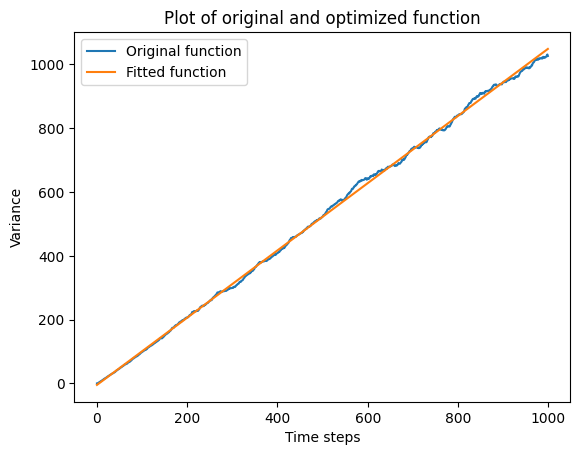

<Figure size 640x480 with 0 Axes>

In [4]:
#TASK 1F

def calculatingPositions(N, M, p_r):
    '''
    Calculates the positions and stores it as a two dimensional array.

    Parameters
    ----------
    N : INT
        number of random walkers.
    M : INT
        number of timesteps.
    p_r : FLOAT
        probability of going to the right.

    Returns
    -------
    positions : ARRAY
        contains the positions.

    '''
    positions = np.ndarray(shape=(N, M))                                        #sets the size of the two dimensional array
    for i in range(0, N):                                                       #loops through the number of random walkers and adds their position to an array
        pos, t = oneRandomWalker(M, p_r)
        positions[i] = pos                                                      #adds the position to the empty position array using indexing
    return positions


def getempiricvariance(N, M, p_r):
    """
    Calculates the empiric variance between the timesteps 

    Parameters
    ----------
    N : INT
        number of random walkers.
    M : INT
        number of timesteps.
    p_r : FLOAT
        probability of going to the right.

    Returns
    -------
    variance : ARRAY
        contains the variance of each step.
    t : ARRAY
        contains the time of each step.

    """
    pos, t = oneRandomWalker(M, p_r)  
    pos_array = calculatingPositions(1000, 1000, 0.5)
    variance = []                                                               #empty list to put in values for the variance
    value = [0,0]
    for i in range(0, M):                                                       #nested loop that calculates the variance and adds it to the list
        variance.append(np.var(value))
        value = []
        for j in range(0, N):
            value.append(pos_array[j][i])
    return variance, t
    
variance, t = getempiricvariance(1000, 1000, 0.5)

def func(t,a,b):                                                                #define a linear function to approximate the curve of variance plotted as a function of time
    return a*t + b

first, second = scipy.optimize.curve_fit(func, t, variance)                     #uses scipy's optimize curve_fit to get the approximated line

a = first[0]                                                                    #retrieves the factors a and b to the straight line
print("The constant a from the variance formula (using optimize function): ", a)
b = first[1]

function_fit = a*t + b                                                          #redefines the optimized curve 

plt.plot(t, variance, label = "Original function")                              #plots the original function and the optimized function
plt.plot(t, function_fit, label = "Fitted function")
plt.title("Plot of original and optimized function")
plt.xlabel("Time steps")
plt.ylabel("Variance")
plt.legend()
plt.figure()
plt.show()


From analysing the plot of the empiric variance one can determine that the function is approximately linear. Moreover, the function grows proportionally with the time steps. If we compare it to the plot of the optimized function, which is linear, one can see that they coincide reasonably accurate. As we concluded in the first assignment, the constant $a$ should have the value $1$. Presented in the answer above, the value of $a$ is reasonably close to 1. If one wanted the optimized result to cohere better with the analytic result, an increase in $N$ would be the logical approach. As we concluded earlier, the variance is proportional to the time steps. Therefore, an increase in $M$ would not give a better estimate. However, if we increase the number of walkers, the sample size would be a larger, thus resulting in a smaller variance. 

So far, we have looked at a random walker’s movement in one dimension. Observing the movement of a walker in two dimensions is more intriguing. The modification is to allow a walker to move along the y-axis as well as the x-axis. We will simulate for an isentropic system, meaning that the probability of moving in any direction is equal. Moreover, we will simulate for an anisotropic system, where there is a different probability of moving in the directions. Hopefully, this will illustrate how different a system of walkers will be if the moves are not truly random.



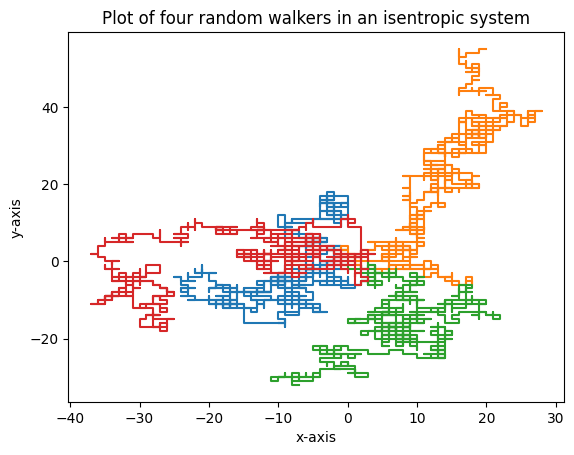

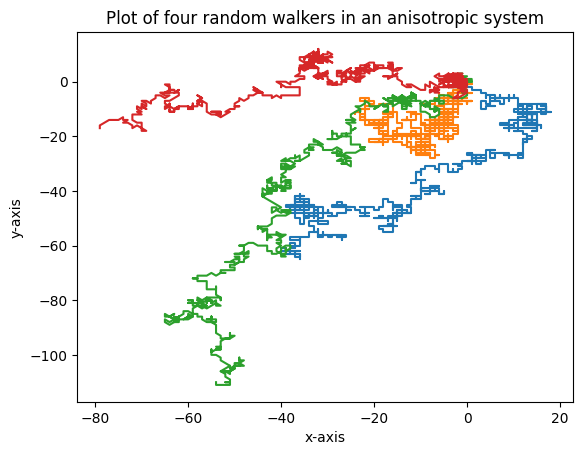

In [5]:
#TASK 1G

def randomWalkers2D(M, p_r, p_u):
    '''
    Calculates the positions for random walkers in 2D

    Parameters
    ----------
    M : INT
        number of timesteps.
    p_r : FLOAT
        probability of going to the right.
    p_u : FLOAT
        probability of going up.

    Returns
    -------
    posx : ARRAY
        array containing the positions on the x-axis.
    posy : ARRAY
        array containing the positions on the y-axis.

    '''
    posx = np.zeros(M)
    posy = np.zeros(M)
    random = np.random.uniform(0,1,M)                       #Array containing random numbers between 0 and 1
    random1 = np.random.uniform(0,1,M)                      #Array containing random numbers between 0 and 1
    for i in range(1, M):                              
        if random[i] > 0.5:                                 #Determines if the walker should move along the x-axis
            posy[i] = posy[i-1]                             #Makes no change in position along the y-axis
            if random1[i] < p_r:                            #Determines if a walker should move right or left
                posx[i] = posx[i-1] + delta_x               #Moves the walker one step to the right 
            else:
                posx[i] = posx[i-1] - delta_x               #Moves the walker one step to the left  
        else:
            posx[i] = posx[i-1]                             #Makes no change in position along the x-axis
            if random1[i] > p_u:                            #Determines if a walker should move up or down
                posy[i] = posy[i-1] + delta_x               #Moves the walker one step up
            else:
                posy[i] = posy[i-1] - delta_x               #Moves the walker one step down   
    return posx, posy

posx, posy = randomWalkers2D(100, 0.5, 0.5)

# plots for four different random walkers isentropic
walker1x, walker1y = randomWalkers2D(1000, 0.5, 0.5)
walker2x, walker2y = randomWalkers2D(1000, 0.5, 0.5)
walker3x, walker3y = randomWalkers2D(1000, 0.5, 0.5)
walker4x, walker4y = randomWalkers2D(1000, 0.5, 0.5)

plt.title("Plot of four random walkers in an isentropic system")
plt.plot(walker1x, walker1y)
plt.plot(walker2x, walker2y)
plt.plot(walker3x, walker3y)
plt.plot(walker4x, walker4y)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()


# plots for four different random walkers anisentropic
walker1x, walker1y = randomWalkers2D(1000, 0.45, 0.55)
walker2x, walker2y  = randomWalkers2D(1000, 0.45, 0.55)
walker3x, walker3y  = randomWalkers2D(1000, 0.45, 0.55)
walker4x, walker3y  = randomWalkers2D(1000, 0.45, 0.55)

plt.title("Plot of four random walkers in an anisotropic system")
plt.plot(walker1x, walker1y)
plt.plot(walker2x, walker2y)
plt.plot(walker3x, walker3y)
plt.plot(walker4x, walker4y)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()



It is difficult to verify if the first plot is truly isentropic, however, upon studying the movements of the four random walkers it seems that no walker has an obvious preference of direction, which would imply an isentropic simulation. Analysing the anisotropic system, on the other hand, it becomes clear that the difference in probability of direction impacts the walkers to head in a general direction rather than a random pattern of movement. Although an isentropic system can technically look identical to the second plot, it is highly unlikely. Therefore one can with reasonable confidence conclude that the plot is a decent representation of an anisotropic system.

What we want to do now is to numerically calculate the probability of a random walker returning to the origin at least once as the time approaches infinity, or mathematically $P(x=0,t\to\infty)$. We know that analytically, we expect the probability to be equal to $1$, and so we want to check if this is true numerically. The reason for this is that we want to quantify how good our solution to the random walkers in two dimensions are before applying it onwards in the report. As we want to simulate random walkers in tumors, it's nescessary to know how good the simulation is.

n(100000) for one dimension:  98.0
n(100000) for two dimensions:  80.0


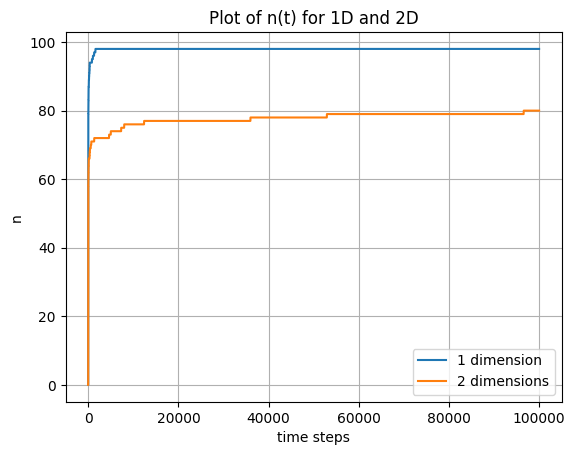

In [6]:
#TASK 1H,I

def n_t(N,M,p_r,p_u):
    '''
    Calculates the amount of visits to the origin in one and two dimensions

    Parameters
    ----------
    N : INT
        number of random walkers.
    M : INT
        number of timesteps.
    p_r : FLOAT
        probability of going to the right.
    p_u : FLOAT
        probability of going upwards.

    Returns
    -------
    originAmount : ARRAY
        contains the visits to the origin in each position.

    '''
    originAmount = np.zeros(M)
    originAmount1 = np.zeros(M)
    if p_u==0:                                                     #If p_u == 0 we have one dimension                                     
        for i in range(0,N-1):
            virre, t = oneRandomWalker(M,p_r)
            originAmount = np.add(originAmount,originAmount1)      #Adds the arrays for every walker together
            for j in range(1,M):                                   #Runs through every step a walker makes
                if virre[j] == 0:                                  #Checks if the walker is in the origin
                    originAmount1[j:M] = 1                         #Gives every element in the array after j, the value 1
                    originAmount1[0:j-1] = 0                       #Gives every element in the array before j, the value 0
                    break
                else:
                    originAmount1[j] = originAmount1[j-1] 
            
    else:                                                          #If we get a nonzero-value for p_u then we have two dimensions
        for k in range(0,N-1):                                
            posx, posy = randomWalkers2D(M,p_r,p_u)
            originAmount = np.add(originAmount,originAmount1)
            for l in range(1,M):
                if posx[l]==0 and posy[l]==0:
                    originAmount1[l:M] = 1
                    originAmount1[0:l-1] = 0
                    break
                else: 
                    originAmount1[l] = originAmount1[l-1]
    
    return originAmount
    
    
M = 100000
N = 100
x = np.linspace(0,M,M)
array1d = n_t(N,M,0.5,0)
array2d = n_t(N,M,0.5,0.5)

#n(t) is how many walkers who have gone through the origin at least once at timestep t

print("n(100000) for one dimension: ", array1d[-1])
print("n(100000) for two dimensions: ", array2d[-1])

#plots the amount of visits to the origin
plt.title("Plot of n(t) for 1D and 2D")
plt.grid()
plt.xlabel("time steps")
plt.ylabel("n")
plt.plot(x, array1d, label = "1 dimension")
plt.plot(x, array2d, label = "2 dimensions")
plt.legend()
plt.show()

$P(x=0, t=1)=0$ for both one and two dimensions. This is because one parameter is that every walker must move for every timestep. Every walker starts at the origin therefore no walker can be at the origin after one time step, because they must move away.

$P(x=0,t=2)=0.5$ for one dimension. This is trivial to calculate as after $t=1$ the walkers have to be either to the left or right of the origin. From $t=1$ to $t=2$ the walkers once again have to move to the right or left. With equal opportunity for both moves, and half of the moves leading back to the origin, $P(x=0, t=2) = 0.5$ stands.

$P(x=0,t=2)=0.25$ for two dimensions. If we keep with the same logic as for one dimension, the walkers are one step away from the origin at $t=1$. From $t=1$ to $t=2$ the walker has four options: up, down, right, left. One of those four options will lead back to the origin and $P(x=0, t=2) = 0.25$ holds.

One can notice that the number of passes through the origin starts out as an aggressive growth, but evens out as more and more walkers leave the vicinity of the origin. This is true for both simulations.
The choice of $N$ comes down to the fact that we need a sample size that gives an accurate representation of the probability.  If one were to choose $N = 1$ the plot would vary from simulation to simulation, and not be an accurate representation of the probability. If one chooses $N$ to be too large, the run time would be unnecessarily long. When choosing a value for $M$ it is important to have it large enough so one can see that the function evens out after a given number of steps. If $M$ is too small, one cannot verify if $P(x=0, t\to\ ∞) = 1$. Ideally, we would have liked to choose $M$ as large as one million or even one billion, however the run time became way too long when choosing those values. Therefore, we landed on $M=100000$. As one can see from the plot (and the values printed) $P(x=0, t\to\ ∞)$ is very close to $1$ for one dimension. For two dimensions $P(x=0, t\to\ ∞)$ is not as close, but it could be closer if we could run more time steps. To discuss our simulation further, one can conclude that our numerical solution for one dimension is so close to the analytical result that any error in using the code could be neglectable. Although our simulation for two dimensions does give a reasonably close result to the analytical result, there may be a too large discrepancy between the two to conclude that our two dimensional simulation is accurate enough.




## Task 2

Until now we have only looked at the movement of random walkers in one and two dimensions, and quantified how good our solutions are. As we know, the diffusion of water molecules depends a lot on how many obstacles they face on their way out of the cell. If there is a high density of cells in an area, the diffusion constant is reduced drastically. This is an area we refer to as a tumor. The water molecules seem to be constricted to a tumor because the timesteps is reduced, meaning that we'll see a higher concentration of water molecules at one determined area. We want to see if we can simulate and locate the position and size of tumors in a system, using our functions for the random walkers in task 1. 

The first thing we have to do is to find a way to implement physical units in our calculations as we may want to change the time steps or the step length, respectively $\Delta t$ and $\Delta x$. We have chosen to define them as global variables in the start of the task. Throughout the remainder of the report $\Delta x$ is described in $\text{mm}$. If there is a need to change the SI-unit, one would only need to change the global variable. 
For the parameters given in the assignment, we find the diffusion constant in healthy tissue by direct substitution of the variables:

$D=\frac{(\Delta x)^2}{2\Delta t}=\frac{(0.004\text{mm})^2}{2\cdot 0.01\text{s}}=0.0008\text{mm}^2\text{s}^{-1}$     

This constant will prove useful as we can utilize it to compare with the diffusion constant in the tumors later in the report. We will focus on writing functions that makes tumors where the diffusion constant is lower, because of the reduction in the diffusion. By assuming that every tumor is circular, we have written a code below that calculates the effective value of $\Delta x$ (the change in position) for every point $(x,y)$. To find the effective $\Delta x$, we also have to use the fact that for every tumor, $\Delta x$ is reduced by $\sqrt t_k$ in the tumor, where $t_k$ is the reduction coefficient of the tumor. This function is then used, along with the simulation of several random walkers, to simulate a system with $15$ tumors. The centers of the tumors is randomly chosen inside a determined area. We can then plot the position of the tumors, analyze the result, and hopefully find out the size of the tumors and where they are located.

For these tasks we created a coordinate system and a matrix. Visually the matrix can be seen as a rectangle with a $resolution \cdot resolution$ amount of squares inside. Each square has a given value for $\Delta x$. This value represents the length a random walker can move when it is located inside the square. We can therefore create a connection between a given coordinate to a square in the matrix. The origin of the coordinate system is therefore located in the middle of the matrix. We can then simulate the tumors by lowering the length a random walker can move once it is inside certain squares. 

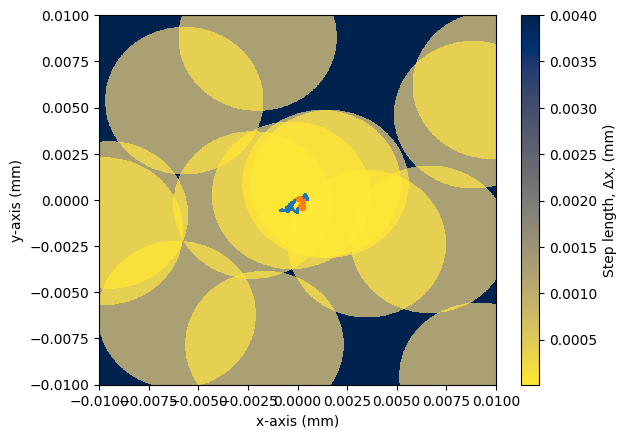

array([[0.004     , 0.004     , 0.004     , ..., 0.00126491, 0.00126491,
        0.00126491],
       [0.004     , 0.004     , 0.004     , ..., 0.00126491, 0.00126491,
        0.00126491],
       [0.004     , 0.004     , 0.004     , ..., 0.00126491, 0.00126491,
        0.00126491],
       ...,
       [0.004     , 0.004     , 0.004     , ..., 0.00126491, 0.00126491,
        0.00126491],
       [0.004     , 0.004     , 0.004     , ..., 0.00126491, 0.00126491,
        0.00126491],
       [0.004     , 0.004     , 0.004     , ..., 0.00126491, 0.00126491,
        0.00126491]])

In [7]:
delta_x = 0.004    #Length of a step
delta_t = 0.01     #Length of a timestep
L_x = 0.02         #Length of the y-axis
L_y = 0.02         #Length of the x-axis
resolution = 1000  #Amount of squares on one axis in the matrix

def randomWalker2D(p_r, p_u, delpha_x, M, x_start, y_start):
    ''' 
    The function calculates the route of a random walker in 2D
    
    Parameters
    ----------
    p_r : FLOAT
        Probability for the walker to take a step to the right.
    p_u : FLOAT
        Probability for the walker to take step up.
    delpha_x : 2D - ARRAY
        Array with every value for delta-x.
    M : INT
        Amount of timesteps.
    x_start : FLOAT
        x-coordinate of the start position.
    y_start : FLOAT
        y-coordinate of the start position.

    Returns
    -------
    posx : ARRAY
        Every x-position the walker registers.
    posy : ARRAY
        Every y-position the walker registers.

    '''
    posx = np.zeros(M)                   #Creates an empty array of x-positions
    posy = np.zeros(M)                   #Creates an empty array of y-positions
    posx[0] = x_start                    #x-coordinate of the start position
    posy[0] = y_start                    #y-coordinate of the start position

    #Arrays with random numbers to decide wheter to move up/down/right/left
    random = np.random.uniform(0, 1, M)  
    random1 = np.random.uniform(0, 1, M)

    #the for-loop goes through every timestep and decides where to move
    for i in range(1, M):
        a, b = getDelta_x(posx[i-1], posy[i-1])   #a and b are the indexes that connect the coordinate system to the matrix
        delta_x = delpha_x[a][b]                  #The length the walker is allowed to move 
        if random[i] > 0.5:                       #if this is True the walker will go left or right
            posy[i] = posy[i-1]                   #The walker will not move in the vertical direction
            if random1[i] < p_r:                  #if True the walker will go right
                posx[i] = posx[i-1] + delta_x     
                if posx[i] > L_x/2:               #Boundary condition, if it goes beyond this position it will stand still
                    posx[i] = posx[i-1]
            else:                                 #if True the walker will turn left
                posx[i] = posx[i-1] - delta_x
                if posx[i] < -L_x/2:              #Boundary condition, if it goes beyond this position it will stand still
                    posx[i] = posx[i-1]
        else:                                     #If True, the walker will go up or down                    
            posx[i] = posx[i-1]                   #The walker will not move in the horizontal direction
            if random1[i] < p_u:                  #if True the walker will go up
                posy[i] = posy[i-1] + delta_x
              
                if posy[i] > L_y/2:               #Boundary condition, if it goes beyond this position it will stand still
                    posy[i] = posy[i-1]
                
            else:                                 #If True, the walker will go down
                posy[i] = posy[i-1] - delta_x
                
                if posy[i] < -L_y/2:              #Boundary condition, if it goes beyond this position it will stand still
                    posy[i] = posx[i-1]     
    return posx, posy                             #Returns the array containing every position the walker has been


def getDelta_x(x, y):
    '''
    This function transforms x og y-coordinates to the equivilent indexes in the matrix.

    Parameters
    ----------
    x : FLOAT
        x-coordinate of interest.
    y : FLOAT
        y-coordinate of interest.

    Returns
    -------
    ycoord : INT
        Given index for the y-value.
    xcoord : INT
        Given index for the x-value.

    '''
    #Creates two arrays to reference a coordinate to a matrix position
    xaxis = np.linspace(-L_x/2, L_x/2, resolution)  
    yaxis = np.linspace(L_y/2, -L_y/2, resolution)
    b = 0

    for i in range(0, resolution):                                  #Iterates through every interval
        if np.any(x <= xaxis[b:b+2]) and np.any(x >= xaxis[b:b+2]): #If True the xcoordinate is inside the intervall
            xcoord = i   #The given index of the matrix that correlates to the x-coordinate
            break
        b += 1 

    b = 0
    for i in range(0, resolution):                                   #Iterates through every interval
        if np.any(y <= yaxis[b:b+2]) and np.any(y >= yaxis[b:b+2]):  #If True the ycoordinate is inside the intervall
            ycoord = i   #The given index of the matrix that correlates to the y-coordinate
            break
        b += 1   
    return ycoord,xcoord #Returns the indexes of the matrix

def findRadiusfromArea(area):
    '''
    Calculates the radius from given area

    Parameters
    ----------
    area : FLOAT
        area the center of tumors are located in.

    Returns
    -------
    FLOAT
        the radius of the area.

    '''
    return np.sqrt(area/np.pi)
    

def tumorLocations(m, t_kA):
    '''
    Function to create and place m-amount of tumors in a matrix
    
    Parameters
    ----------
    m : INT
        Amount of tumors.
    t_kA : ARRAY
        Values for tumor coefficients.

    Returns
    -------
    grid1 : 2D-ARRAY
        Grid with values for delta_x.

    '''
    area = np.pi*delta_x**2                        #Defining the area of tumors
    r = findRadiusfromArea(area)                   #Find the radius of a given circle
    
    #Creates m-amount of random centers
    center = np.ndarray(shape=(m, 2))
    for i in range(0, m):
        xCoord = int(np.random.randint(resolution))
        yCoord = int(np.random.randint(resolution))
        center[i][0] = xCoord #x-coordinate of center
        center[i][1] = yCoord #y-coordinate of center
    
    x = np.linspace(-L_x/2, L_x/2, resolution)     #Creates an x-axis, with a given amount of steps
    y = np.linspace(-L_y/2, L_y/2, resolution)     #Creates a y-axis, with a given amount of steps
    xv, yv = np.meshgrid(x, y)                     #Creates a meshgrid of the linspaces
    grid = np.ndarray(shape=(len(xv), len(yv)))    #Creates a 2D-array
    grid.fill(delta_x)                             #Fills the matrix with numbers representing healthy tissue
    
    #The for-loop places the tumors and updates the values sourrounding the tumor with the tumor coefficient
    for j in range(0,m):           #The loop places one tumor at a time
        t_k = t_kA[j]              #Chooses a tumor coefficient
        cx = int(center[j][0])     #Gets the x-index of the tumor position
        cy = int(center[j][1])     #Gets the y-index of the tumor position
        for i in range(0, len(x)): #Updates every value inside the radius of the tumor
            grid[i] = np.where(r < np.sqrt(((xv[i]-xv[cx][cy])**2) + (yv[i]-yv[cx][cy])**2), grid[i], grid[i]*np.sqrt(t_k)) 
    grid1 = np.flip(grid, 0)       #Have to flip the grid because python reades from top to bottom
        
    plt.pcolormesh(xv, yv, grid, shading = 'auto', alpha = 1, cmap = 'cividis_r')
    cbar = plt.colorbar()
    cbar.set_label("Step length, Δx, (mm)")
    plt.xlabel("x-axis (mm)")
    plt.ylabel("y-axis (mm)")
    return grid1


def function2C(m, M):
    '''
    Function to send random walkers inside a grid with tumors.

    Parameters
    ----------
    m : INT
        How many tumors to ble placed in a given area.
    M : INT
        How many timesteps the walkers are moving.

    Returns
    -------
    tumorlocations : 2D-ARRAY
        Grid with values for delta_x.

    '''
    #Fills an array with tumor coefficient
    t_kA = np.zeros(m+1)   
    for i in range(0, m):
        t_kA[i] = 0.1
    
    tumorlocations = tumorLocations(m, t_kA)                         #Retrieves a matrix with tumors
    posx1, posy1 = randomWalker2D(0.5, 0.5, tumorlocations, M, 0,0)  #Sends a random walker through the area from origin
    posx2, posy2 = randomWalker2D(0.5, 0.5, tumorlocations, M, 0,0)  #Sends a random walker through the area from origin
    plt.plot(posx1, posy1)
    plt.plot(posx2, posy2)
    plt.show()
    return tumorlocations

function2C(15, 1000)

Analyzing the plot we find that in the intersection between two or more tumors, the random walkers are more confined to this area. We also see that in the tumors, there are more steps inside the tumor before eventually diffusing out. We can clearly see that where the tumors overlap, $\Delta x$ is very small compared to the value of $\Delta x$ where there are no tumors. Since we only have plotted for $N=2$ walkers, where they both start in $(0,0)$, it makes sense that they are so confined to their area when we also take the timesteps into consideration. 
We know that in a tumor, the diffusion constant is significantly lower. Seeing that the change in position is much smaller, we can now confirm this by calculating the diffusion constant and compare it to the diffusion constant in healthy tissue. We can extract a value of $\Delta x$ and calculate the diffusion constant $D$ and compare it to the result found in task 2A). Doing this we find that in a tumor the tumorcoefficient has reduced the step length to $\Delta x = 0.00126491$. Using this we calculate the new diffusion constant to be

$D=\frac{(0.00126491\text{mm})^2}{2\cdot0.01\text{s}}=0.000079999$. 

Comparing this to the value in 2A), we find it to be reduced by a factor of $10^{-1}$. This means that the diffusion of water molecules in this area is significantly lower than in healthy tissue, which implies that there is in fact a tumor in this area. 

In this code we have also implemented boundary conditions, as the diffusion in the body is limited by several factors. The one we have chosen to implement is so called hard walls, which means that the random walkers cannot leave the predetermined area. To implement this, we have kept the random walkers in place if they reach the hard wall, which is set at $x=\pm L_x/2$. The reason we have gone with this choice of boundary condition is that it hinders the random walkers to exit the area. Otherwise, we could end up with simulations where all the random walkers left the area before passing through a tumor. The weakness with this boundary condition is that if we hinder a random walkers movement, it is no longer truly random. We allow ourselves to hinder a random walkers movement because we assume that the probability of a walker leaving the area is equal to the probability of a walker entering the area. We determine this approach to be as exact as a simulation with periodic walls where a walker enters the opposite side of the area. Our reasoning is grounded in the fact that whether a walker enters at the same point of an exit or at the opposite side of the exit is equally likely.

Now that we have a simulation of the random walkers in- and outside of tumors, we can use this to get an image of the tumors. The way we do this is to calculate the intensity, which is defined as 

$I(i,j)=\frac{\text{number of times a random walker has been to a position } i,j}{MN}$ 

The intensity is a tool that we can use to see if we can accurately find out the size and location of the tumors, using the previous functions. We'll want to plot the intensity alongside with the tumors, to see if it can be used to detect the size and position of the tumors. To do this accurately, we also have to think about our choices for the variables that the function will use.

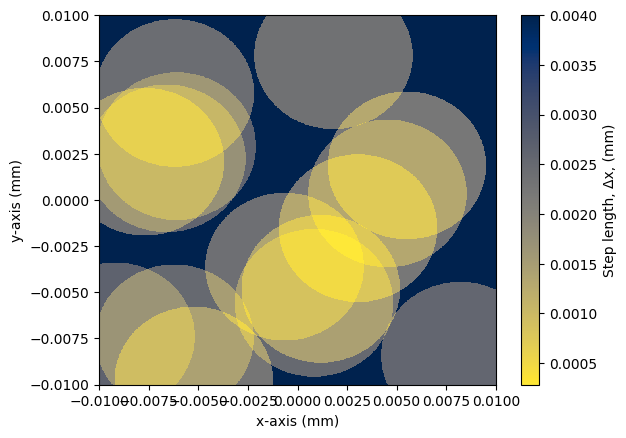

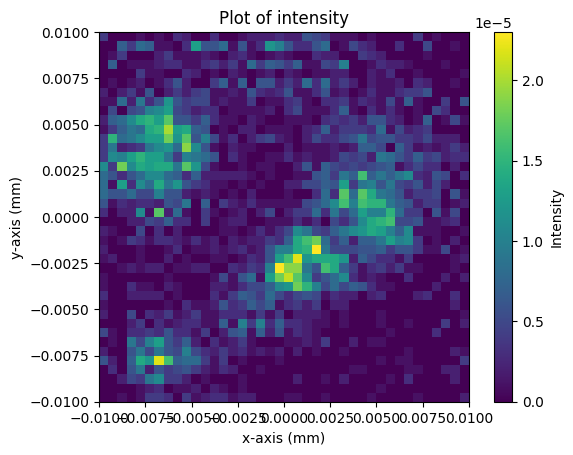

(array([[0.e+00, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 4.e-06],
        [0.e+00, 0.e+00, 0.e+00, ..., 1.e-06, 0.e+00, 0.e+00],
        [1.e-06, 0.e+00, 2.e-06, ..., 4.e-06, 7.e-06, 0.e+00],
        ...,
        [0.e+00, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
        [0.e+00, 0.e+00, 2.e-06, ..., 0.e+00, 1.e-06, 0.e+00],
        [2.e-06, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00]]),
 array([-0.01  , -0.0095, -0.009 , -0.0085, -0.008 , -0.0075, -0.007 ,
        -0.0065, -0.006 , -0.0055, -0.005 , -0.0045, -0.004 , -0.0035,
        -0.003 , -0.0025, -0.002 , -0.0015, -0.001 , -0.0005,  0.    ,
         0.0005,  0.001 ,  0.0015,  0.002 ,  0.0025,  0.003 ,  0.0035,
         0.004 ,  0.0045,  0.005 ,  0.0055,  0.006 ,  0.0065,  0.007 ,
         0.0075,  0.008 ,  0.0085,  0.009 ,  0.0095,  0.01  ]),
 array([-0.01  , -0.0095, -0.009 , -0.0085, -0.008 , -0.0075, -0.007 ,
        -0.0065, -0.006 , -0.0055, -0.005 , -0.0045, -0.004 , -0.0035,
        -0.003 , -0.0025, -0.002 , -0.0015, -0

In [8]:
def findMinandMax(posx, posy):
    '''
    Finds the minimum and maximum element in posx and posy

    Parameters
    ----------
    posx : ARRAY
        contains the positions on the x-axis.
    posy : ARRAY
        contains the positions on the y-axis.

    Returns
    -------
    minx : FLOAT
        minimum value in posx.
    maxx : FLOAT
        maximum value in posx.
    miny : FLOAT
        minimum value in posy.
    maxy : FLOAT
        maximum value in posy.

    '''
                                                    #finds the min and max using numpy
    minx = np.min(posx)                          
    maxx = np.max(posx)
    miny = np.min(posy)
    maxy = np.max(posy)
    
    return minx, maxx, miny, maxy


def createRandomStart(start, stop):
    '''
    Creates a random starting position for each random walker

    Parameters
    ----------
    start : FLOAT
        start position of the line to choose value for x.
    stop : FLOAT
        end position of the line to choose value for x.

    Returns
    -------
    x : FLOAT
        start position on the x-axis.

    '''
    line = np.linspace(start, stop, resolution)                                 #creates an array             
    x = np.random.choice(line)                                                  #choose a random point from the array
    return x

def getRandomCoeffisient():
    return np.random.uniform(0.3, 0.45)                                         #gets a random value for the tumorcoeffisient in the given interval

def findIntensity(nx, ny, M , N, m):
    '''
    Calculates the intensity of the number of random walkers in every grid i,j

    Parameters
    ----------
    nx : INT
        gives the resolution of the plot in the x-direction.
    ny : INT
        gives the resolution of the plot in the y-direction.
    M : INT
        number of timesteps.
    N : INT
        number of random walkers.
    m : INT
        number of tumors.

    Returns
    -------
    h : 2D-ARRAY
        contains the intensity for every grid i,j.
    xedges : 1D-ARRAY 
        contains the bin edges along the first dimension.
    yedges : 1D-ARRAY
        contains the bin edges along the second dimension.

    '''
    h = np.ndarray(shape =(nx,ny))                                              #creates an empty array to fill with the values of the intensity
    h.fill(0)                                                                   #fills it with zeros to begin with
    xarray = np.linspace(-L_x/2, L_y/2, nx+1)                                   #creates the grid in x-direction
    yarray = np.linspace(-L_x/2, L_y/2, ny+1)                                   #creates the grid in y-direction

    t_kA = np.zeros(m+1)
    for i in range(0, m):                                                       #gets the random tumorcoeffisients for m amount of tumors
        t_kA[i] = getRandomCoeffisient()
        
    tumorlocations = tumorLocations(m, t_kA)                                    #gets the tumor locations and plots them
    plt.show()
    
    for i in range(0, N):                                                       #loops through the number of random walkers and calculates the intensity in every grid i,j 
        x_start = createRandomStart(-L_x/2, L_x/2)                              
        y_start = createRandomStart(-L_y/2, L_y/2)
        posx, posy = randomWalker2D(0.5, 0.5, tumorlocations, 50, x_start, y_start) 
        minx, maxx, miny, maxy = findMinandMax(posx, posy)
        histogram , xedges, yedges= np.histogram2d(posx,posy, bins = (xarray, yarray), range = [[minx,maxx], [miny,maxy]])      #uses numpy's histogram2d to calculate the number of random walkers in every grid i,j, with given parameters    
        histogram = histogram/(M*N)                                                                                             #calculates the intensity in every grid i,j by dividing with M*N  
        h += histogram
    plt.imshow(h.T, origin='lower', extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]])                                    #plots the intensity
    cbar = plt.colorbar()
    cbar.set_label("Intensity") 
    plt.title("Plot of intensity")
    plt.xlabel("x-axis (mm)")
    plt.ylabel("y-axis (mm)")
    plt.show()
    return h, xedges, yedges

findIntensity(40, 40, 10000, 100, 15)

In findIntensity(), we have purposely chosen to not include the minimum and maximum value of x and y in the functions argument. The reason for this is that we want to plot the intensity for $N$ random walkers, and it's more neat to calculate the minimum and maxiumum value for x and y for $N$ random walkers inside the for loop where we are calculating the intensity. This makes the code more legible. 

We have chosen $M=N=1000$, $m=15$ and $L_x=L_y=0.02$. The reason we have chosen a high value for $M$ and $N$ is that we found the intensity plot to be more accurate with more random walkers and timesteps, than with fewer. One fallpit with the number of random walkers is that with more random walkers, we get multiple starting positions which means that if $M$ is not reasonibly large, we get a less accurate image of the tumors. The choice of $L_x$ and $L_y$ decides the size of the plot we look at. We value we have chosen gives what we mean is the best size of the plot. 
Even though we can see the position of the tumors, we can argue that it is not very reliable to only use the intensity plot to detect the position of the tumors. As we see from the intensity plot, it gives us only the location of the most overlapping tumors. We also see that the size of the tumors is not very well represented. Aligning the tumor plot with the intensity plot, we see that the intensity plot is overall not very good at detecting size and position. We should therefore only use the intensity plot as an indication as to where the tumors are, especially with a high number of random walkers. 
 
After looking at the intensity plot, we may find it easier to see the location and concentration of the tumors when applying a Sobel-filter to the intensity plot. This filter makes the edges easier to see, and therefore see more accurately where the tumors are and the concentration. 

$\text{NOTE:}$ In the code for the Sobel-filter, we used $\text{ndimage.rotate}$. The reason for having to rotate the arrays, is that in task 2B and 2C, we had to use $\text{np.flip}$. This made our image initially inverted, after applying the Sobel-filter. Therefore we used $\text{ndimage.rotate}$ to rotate the arrays back to its original shape.

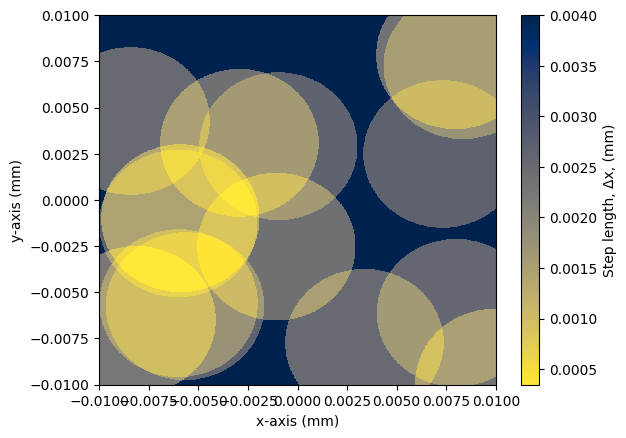

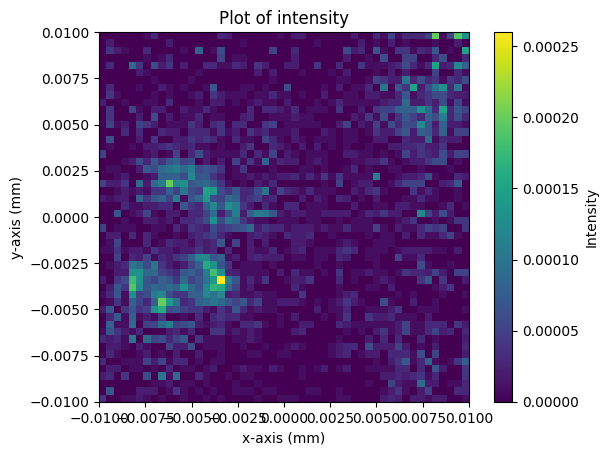

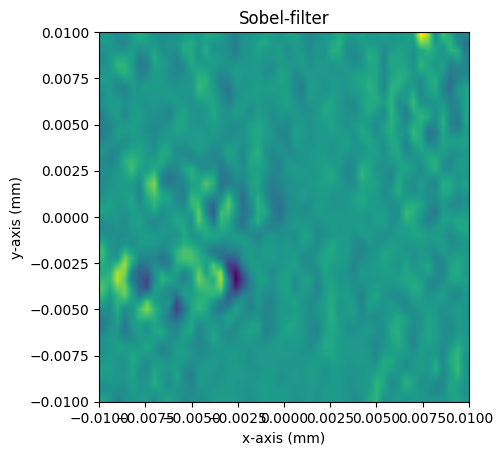

In [9]:
def SobelFilter():
    '''
    Implements the Sobel-filter on the intensity plot

    Returns
    -------
    None.

    '''
    gx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])                               #matrix to estimate the changes in pixel-values in the x-direction
    gy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])                               #matrix to estimate the changes in pixel-values in the y-direction
    histogram, xedges, yedges = findIntensity(50, 50, 1000, 100, 15)                  #retrivies the data from the intensity function
    X = scipy.ndimage.convolve(histogram, gx)                                         #calculates the gradient in the x-direction by convolution
    Y = scipy.ndimage.convolve(histogram, gy)                                         #calculates the gradient in the y-direction by convolution
    totalSobel = np.sqrt(X**2 + Y**2)                                                 #calculates the gradient magnitude
    result = scipy.ndimage.sobel(totalSobel, axis = 0)                                #calculates the final sobel filter using the gradient magnitude
    result = scipy.ndimage.rotate(result, 90)                                         #rotates the array 90 degrees
    plt.xlabel("x-axis (mm)")
    plt.ylabel("y-axis (mm)")
    plt.title("Sobel-filter")                                                         
    plt.imshow(result, interpolation = "bilinear", extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

SobelFilter()

If we were to choose $n$ as a low value, for example $n=10$, the image from the Sobel-filter would only give us a general idea of where the tumors are. The squares registered in the intensity plot would be too large, and it would not be accurate in regard to where a tumor starts or ends. However, if n is too large, for example $n = 150$, the Sobel-filter would only give small indications of where the tumors are. The value that gives the best representation of the tumor location would be a value in the middle, for example $n=50$. For this value one can clearly see where the highest concentration of tumors are, and also be able to see where the overlap of tumors end.
When the simulation is run with the resolution ($n$) too high we get a blank plot of the intensity, and the Sobel-filter. This is because when the resolution is high the area we study is divided into a large number of very small squares. This means that the intensity is almost always low or zero because the number of squares a walker can move trough is way too large.

## Conclusion

In this project we wanted to see if random walkers could simulate the behaviour of the diffusion of the water molecules in the brain. From the beginning we have emphasized the importance of the simulations of random walkers in two dimensions. We can clearly see that if they hadn't behaved correctly, we would have gotten wrong simulations and plots later in the report. We can see that because the random walkers behave as they should, the tumor concentration and location becomes clear when we look at the intensity plot and the application of the Sobel-filter. As we saw in task 2, the diffusion constant changes significantly when the random walkers are in a tumor. This implies that there is a higher density of cells in that area, meaning that there could be a tumor in that area. Given the application of the Sobel-filter and the intensity plot, it becomes easier to see if this is correct. Even though this report is a simplification of MRI in reality, as we for example are not taking the magnetic field into consideration, it's still a good indication of how the diffusion changes when compared to healthy tissue. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cd6ccab4-d3fc-4f09-8ef2-c2ea7ad12035' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>